<img src='graphics/titanic.jpg'>

# 012 Exploratory Data Analysis (EDA), Part 1

In past sessions we have talked about initial data analyses (IDA) briefly, and we described some of the quick commands to learn more about your data. We have also talked about visualizing data with Matplotlib and Seaborn in the previous two meetings. In this notebook, we will bring all of these lessons together to talk about how to explore your data more fully in what is the first important step in data analytics and data science.

# What is an EDA?

The National Institute of Standards and Technology (NIST) describes an EDA as an approach/philosophy for data analysis that employs a variety of techniques to:
1. **maximize** insight into a data set;
1. **uncover** underlying structure;
1. **extract** important variables;
1. **detect** outliers and anomalies;
1. **test** underlying assumptions;
1. **develop** parsimonious models; and
1. **determine** optimal factor settings.

While there are multiple ways to approach and code an EDA, there is only three steps in the process.
- Explore / Question
- Clean / Verify
- Document / Save

As we have said many times already in our meetings, a common phrase within data analytics and data science is that 80%-90% of a data analysis' or data scientist's job is spent cleaning data ("data munging"). And to begin doing that, we have to know the data.

___
___

# The Dataset

This is our first introduction to the famous (at least within the data munging) Titanic Dataset. 

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

This dataset consists of the manifest of the Titanic passengers on that fateful voyage. The dataset is split into two sub-sets:
- train.csv
- test.csv

The training set is used to build your machine learning models, which we will do in later meetings. For the training set, the outcome (also known as the “ground truth”) for each passenger is provided. Our later predictive machine learning model will be based on “features” like passengers’ gender and class. 

The test set is used to see how well our yet to be built machine learning model performs on unseen data. For the test set, the ground truth for each passenger is not provided. In a later meeting, it will be our job to predict these outcomes. 


## Data Dictionary
- 1survival: Survival- 0 = No, 1 = Yes
- pclass: Ticket class- 1 = 1st, 2 = 2nd, 3 = 3rd
- sex: Gender	
- Age: The ticket holder's age in years	
- sibsp: # of siblings / spouses aboard the Titanic with the ticket holder	
- parch: # of parents / children aboard the Titanic with the ticket holder	
- ticket: Ticket number	
- fare: Passenger fare	
- cabin: Cabin number	
- embarked:Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

### Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

___ 

# Step 1 - Explore and Question the Data

## Step 1a - Loading the data

To begin, we need to load the data into a Pandas DataFrame. In the next block,
1. Load the Pandas Library
1. Load the train.csv dataset
1. Check the first five rows of the DataFrame to get our first look at the data

In [1]:
# Write your code here. 



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Step 1b - Questioning the Data

Next, with the raw data, we begin to question the data. 

### Question 1: How large is the dataset?

Using what you have learned, write the code to find out how large is the dataset.

In [2]:
# Write your code here. 



(891, 12)

### Question 2: What types of variables are in the dataset?

Using what you have learned, write the code to find out what types of variables are in the dataset. 

In [3]:
# Write your code here. 



PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### Examination Notes
As we look at the types of variables, is there anything that stands out which we may want to take note of and address later in our cleaning?

___

### Question 3: Are there any missing values in the dataset?

Missing values are important to know as it will affect our later analyses. There are a number of ways to address missing values when we later build our predictive machine learning model, but for now - as this is an *EXPLORATORY* data analysis - we are focused only on exploring the data. We will clean it in the next step.

#### Method 1: `.info( )`

The first method, which we have already covered, is the `.info( )` method. Since you already know this method, go ahead and code this method. Using what you have learned, go ahead and code the next line yourself, then run it. 


In [4]:
# Write your code here. 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Method 2: `isnull( ).sum( )`

To find missing values in a dataset, we use the `.isnull()` command, and since we will want the total of any missing values by column, we will want to add `.sum()` on to that command.

Because we did not cover this command before, I took the liberty of coding it for you. Run the next line of code.

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Bonus Challenge

Reaching back to our discussions on graphing, write the code to graph the sum of nulls in Matplotlib.

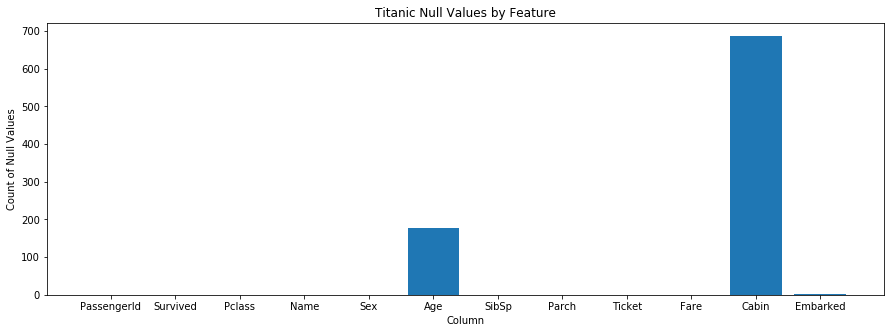

In [6]:
# Write your code here. 



#### Examination Notes 
Do we see anything that we will want to note about missing values as we get to the next or subsequent phases?

___


### Question 4: Are there any duplicated rows in the dataset?

As we might suspect, duplicated observations/rows will throw our later anlaysis off. In order to find the count of duplicated values, we want to use the `.duplicated()` command. And again, since we want to look at a count of the number of duplications within the dataset we will want to add the `.sum()` command to our code. 


In [7]:
# Write your code here. 



0

### Question 5: What is the statistical description say about the dataset?

Given our past discussions, use the appropriate command to show the statistical description of the dataset.

In [8]:
# Write your code here. 



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Exercise 1

We have done a number of things already to explore and question our data. In order to make it easier to picture in our heads, in the next block write out code to do Step 1 so that it is in one block of code (answering the four questions we asked in Step 1). 

### Extra Challenge
Can you write this in one line of code, giving each element a title, and separating the output by a blank space so it is easier to read?

In [9]:
# Write your code here. 




Shape:  (891, 12) 

Variable Types:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object 

Number of null values: 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 

Number of duplicated rows:
  0 

Statistical description:
        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000

# Step 2 - Clean and Verify the Data

Now that we have done an initial look at the data, we know that there is some cleaning to do. Looking back at our notes from Step 1, we know that some of the variable types need to be changed. 
1. Let's discuss each variable before we change them. 
1. Then we will change each variable type to what we need them to be. 

>### A note on EDA intended output
>Not every problem is the same, so not every EDA exercise will be either. Beyond the basic quality and cleanliness of your dataset (as Omar Elgabry states), “Understanding what are you trying to accomplish, your ultimate goal is critical prior to taking any actions.”. A clear understanding of the purpose and intended use case for your final dataset will inform any additional EDA tasks you may wish to perform.

>For example, if your goal is to run your data through a machine learning algorithm to solve a binary classification problem (i.e. predict an outcome of yes/no, is likely/not likely, etc.), you’ll need to perform some type of “preprocessing” on your target (predictor) variable to assign binary values to your positive (1) and negative (0) classes. If your data includes “categorical” data types, you’ll need to convert them to numerical values prior to machine learning. A common pandas method to accomplish this is:
>`.get_dummies()` — convert categorical variables [https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html]

## Integer, Float or Object?
How many of our variable types are integers or floats which will be used as text or "objects"?

In the next block, using what we have already learned from our meetings about Pandas, change the variables appropriately from our discussion for this dataset. Then verify that the changes have taken place. 

In [10]:
# Write your code here



PassengerId     object
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## What about Column Titles?

This step is purely optional, but we will do it anyway so that we have nice and clean column titles. 

When we talked about Pandas previously, we discussed on method of changing column titles by listing them out in a dictionary and changing the titles. While that method is fine for the dataset we used at the time (and could be used for this dataset given its limited number of columns), what happens when you have 25 feature names? 75? 1000?

Another simple method to changing all of the feature names to columns is to use the `map()` command - which maps back to the DataFrame what you want to change. In addition, we want to use the `.lower()` command which changes all of the strings that you designate to all lower case. 

I took the liberty of writing out this code so you can see how it works. 

In [11]:
# Map the lowering function to all column names
df.columns = map(str.lower, df.columns)

df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exercise 2: Verify and Explore the Data a Bit More

Now that we have cleaned our data, let's do a bit more exploring by way of separating and plotting the values.

### Separating the columns into numeric & categorical

Having a list of the numeric columns and a list of the categorical columns comes in handy for plotting and for working with each category. In the next block, write a block of code that examines each column and separates it into a numeric column (num_column) list or into a categorical column (cat_column) list. Then print out each list with a title to the list. 

In [12]:
#Write your code here.



Numeric columns:
 ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']

Categorical columns: 
 ['passengerid', 'name', 'sex', 'ticket', 'cabin', 'embarked']


#### So why do we want to lists of column types?

In the next block of code you will see that by having a list of all of the numerical column names, we can produce multiple charts with one simple line of code. 

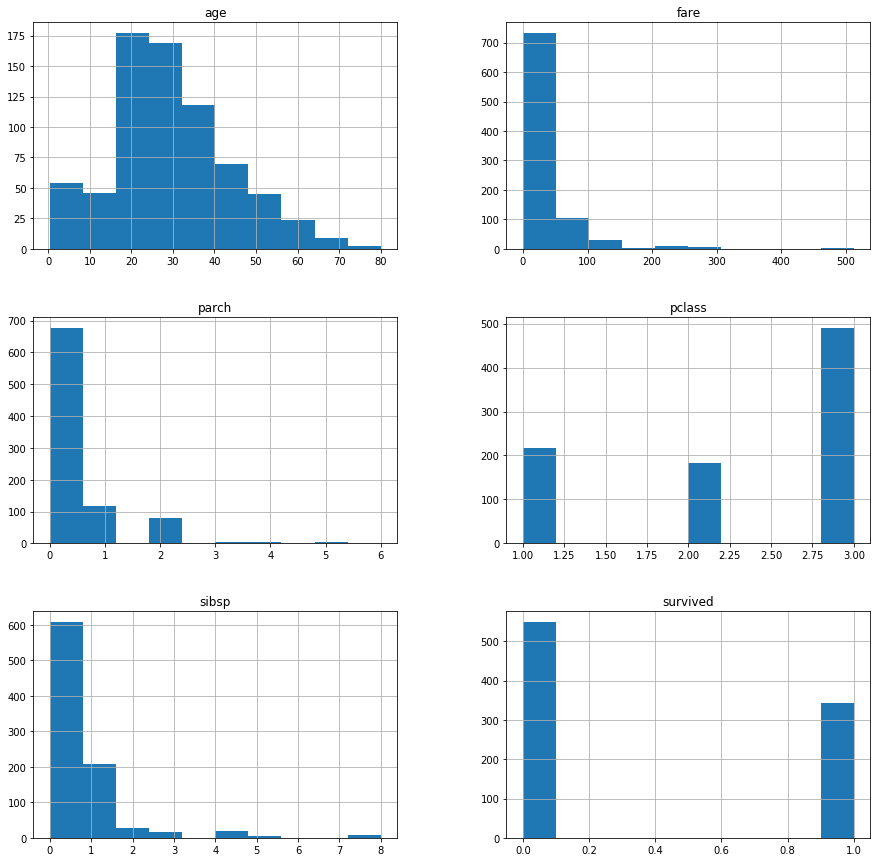

In [13]:
#This will turn off any warnings from running the next bit of code.
import warnings
warnings.filterwarnings('ignore')

#We set the figure size.
plt.figure(figsize = (15,15))

#This allows you to retrieve the axis in the figure we will create
# so that we can print two charts side by side. 
# It is needed in the next line of code.
ax = plt.gca()

#This plots each of the numerical columns on a separate histogram
# with two histograms per row.
df[num_columns].hist(ax=ax)

# And this shows the graphs.
plt.show()

### pclass & survived

Using the seaborn library, select an appropriate plot to examine the relationship between pclass and survived.

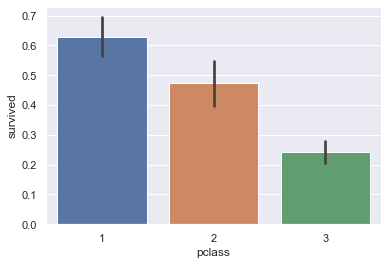

In [14]:
#Write your code here. 



### sex & survived

Using the seaborn library, select an appropriate plot to examine the relationship between sex and survived.

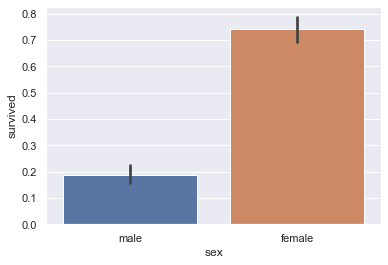

In [15]:
# Write your code here. 



### age & survived

Using the seaborn library, select an appropriate plot to examine the relationship between age and survived.

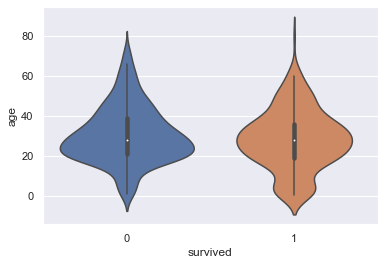

In [16]:
# Write your code here. 



### parch & survived

Using the seaborn library, select an appropriate plot to examine the relationship between parch and survived.

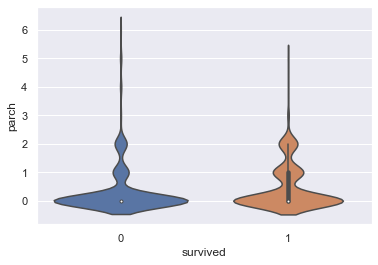

In [17]:
# Write your code here. 



### embark & survived

Using the seaborn library, select an appropriate plot to examine the relationship between embarked and survived.

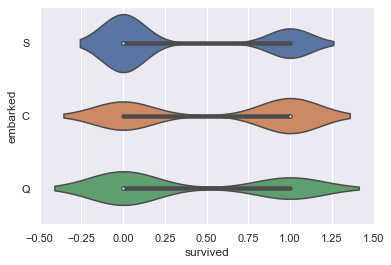

In [18]:
# Write your code here. 



### sibsp & survived

Using the seaborn library, select an appropriate plot to examine the relationship between sibsp and survived.

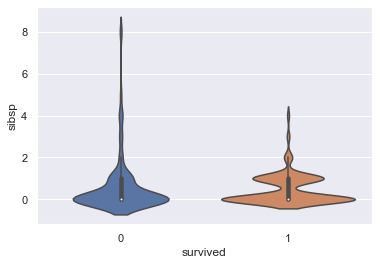

In [19]:
# Write your code here. 



### fare & pclass & survived

Using the seaborn library, select an appropriate plot to examine the relationship between fare, pclass, and survived.

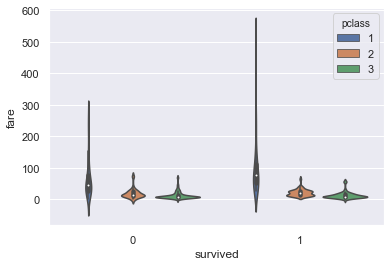

In [20]:
# Write your code here. 



### sex & pclass & survived

Using the seaborn library, select an appropriate plot to examine the relationship between sex, pclass, and survived.

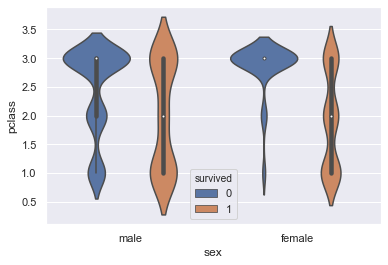

In [21]:
# Write your code here. 



### sex & age & survived

Using the seaborn library, select an appropriate plot to examine the relationship between sex, age, and survived.

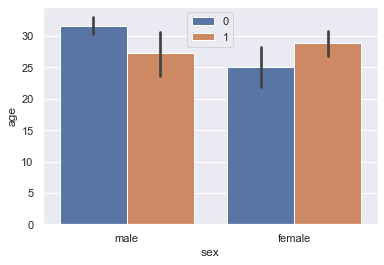

In [22]:
# Write your code here. 



### sex & parch & survived

Using the seaborn library, select an appropriate plot to examine the relationship between sex, parch, and survived.

(0, 6)

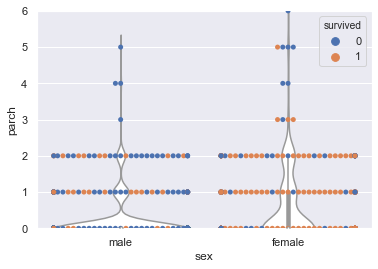

In [23]:
# Write your code here. 



### age & pclass & survived

Using the seaborn library, select an appropriate plot to examine the relationship between age, pclass, and survived.

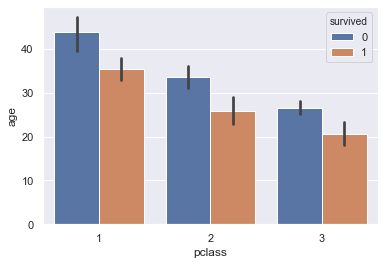

In [24]:
# Write your code here. 



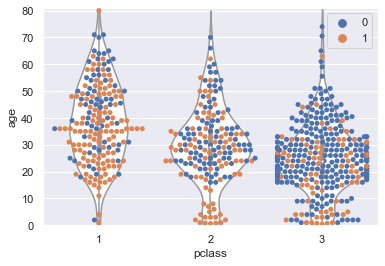

In [25]:
# Write your code here. 



### Bonus Lesson Item: crosstab

For color selections, go to [https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html#sphx-glr-tutorials-colors-colormaps-py]


In [26]:
pd.crosstab([df.sex, df.survived], df.pclass, margins=True).style.background_gradient(cmap='plasma_r')

In [27]:
pd.crosstab([df.sibsp, df.survived], df.pclass, margins=True).style.background_gradient(cmap='magma_r')